<a href="https://colab.research.google.com/github/KarabiMandal185/Assignment-aiml-1/blob/main/Assignment5(lab).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Task 1: Import required packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

In [2]:
# Task 2: Load the Titanic dataset
titanic_df = pd.read_csv('/content/titanic_train.csv')


In [3]:
# Task 3: Check data types of each feature
print(titanic_df.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [4]:
# Task 4: Generate summary statistics
print(titanic_df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [5]:
# Task 5: List column names
print(titanic_df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [6]:
# Task 6: Perform exploratory analysis
sns.set()

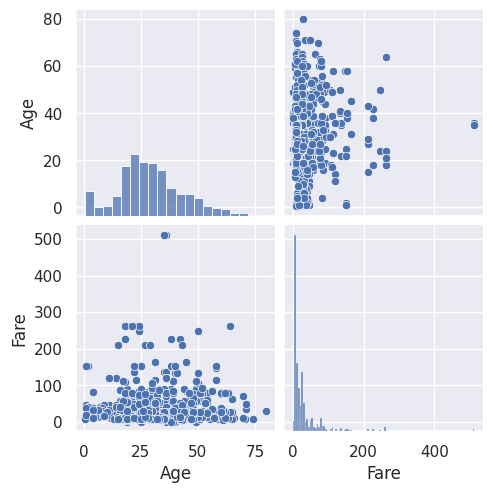

In [7]:
# Plot numeric features
sns.pairplot(titanic_df, vars=['Age', 'Fare'])

<Axes: xlabel='Survived', ylabel='count'>

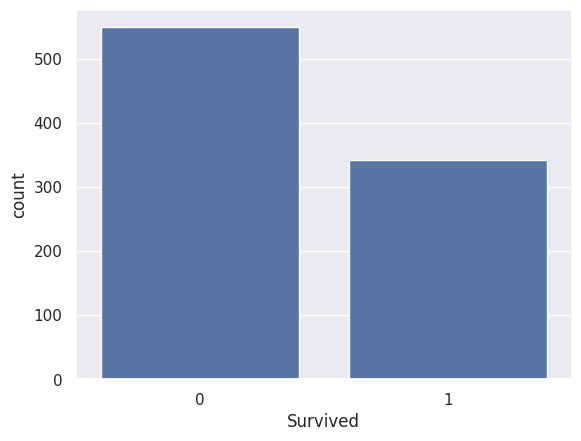

In [8]:
# Check relative size of survived/un-survived
sns.countplot(x='Survived', data=titanic_df)

<Axes: xlabel='Sex', ylabel='count'>

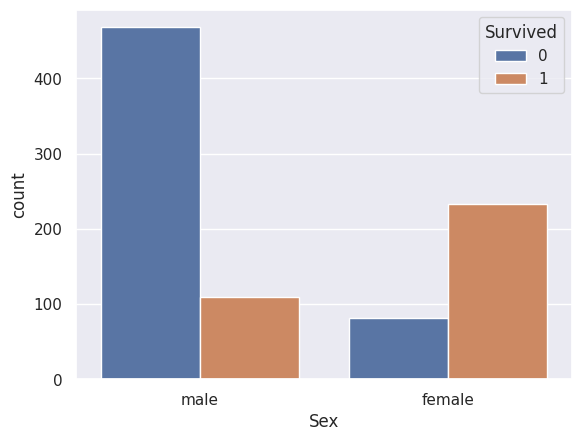

In [9]:
# Check pattern on gender
sns.countplot(x='Sex', hue='Survived', data=titanic_df)

<Axes: xlabel='Pclass', ylabel='count'>

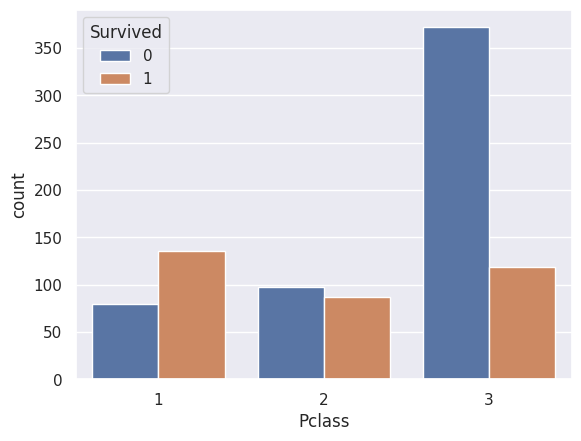

In [10]:
# Check pattern on passenger class
sns.countplot(x='Pclass', hue='Survived', data=titanic_df)


<Axes: xlabel='Pclass', ylabel='Survived'>

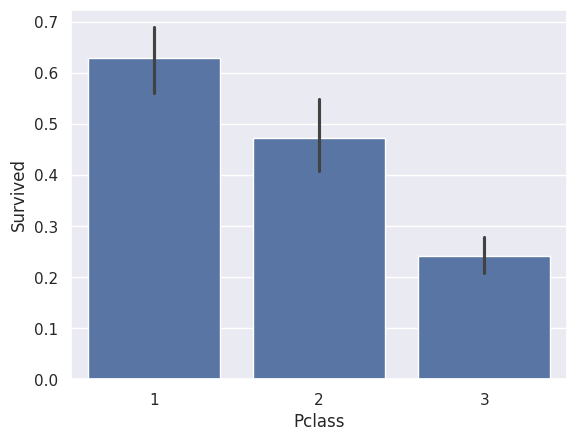

In [11]:
# Check class-wise survival rate
sns.barplot(x='Pclass', y='Survived', data=titanic_df)


<Axes: xlabel='SibSp', ylabel='Count'>

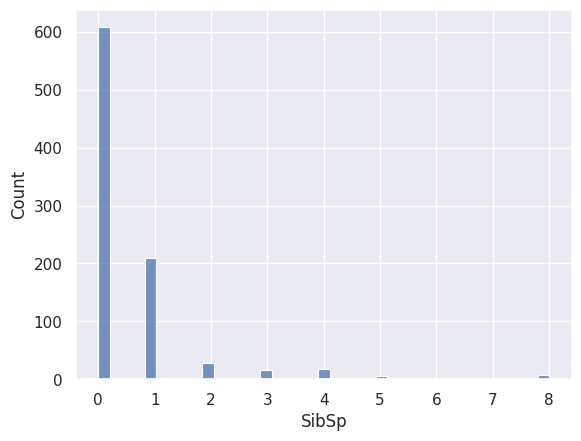

In [12]:
# Check sibsp distribution
sns.histplot(titanic_df['SibSp'])

<Axes: xlabel='Age', ylabel='Count'>

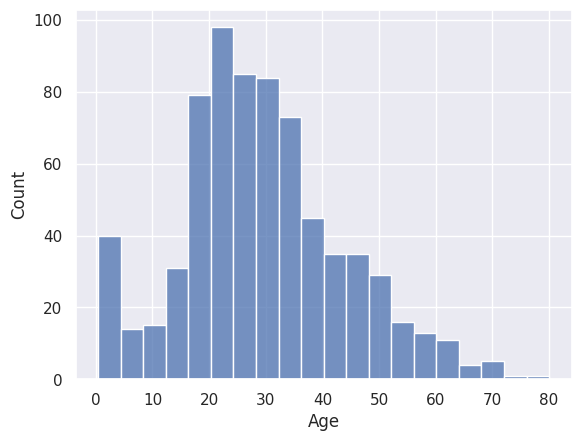

In [13]:
# Check overall age distribution
sns.histplot(titanic_df['Age'])

<Axes: xlabel='Pclass', ylabel='Age'>

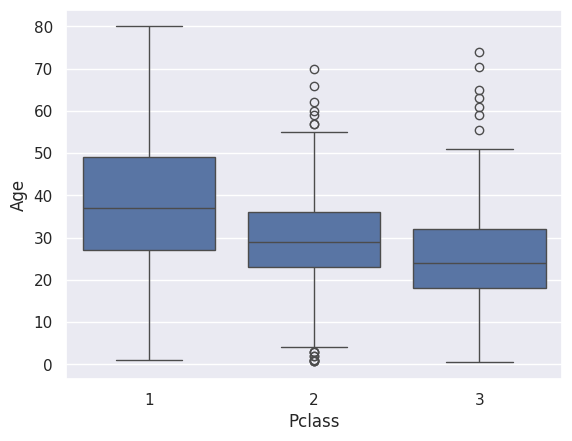

In [14]:
# Check class-wise age distribution
sns.boxplot(x='Pclass', y='Age', data=titanic_df)


In [15]:
plt.show()

Columns 'Cabin' and/or 'Ticket' not found in DataFrame.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

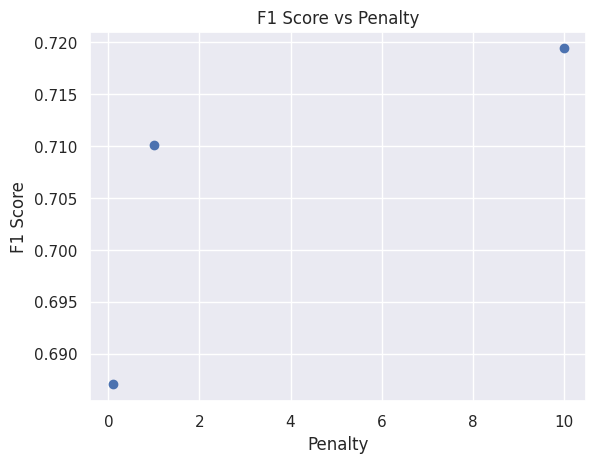

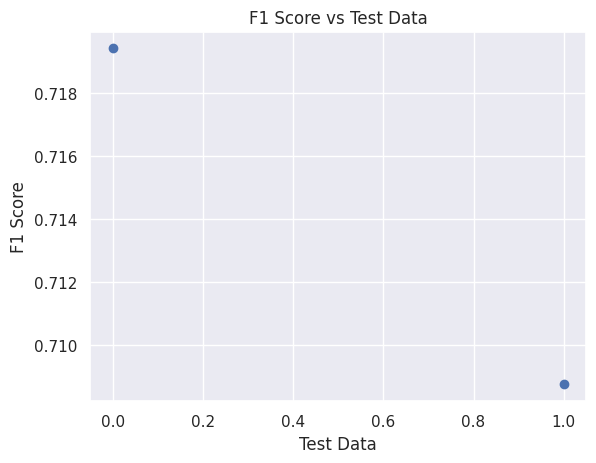

In [27]:
# Impute age data with median age
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)

# Check if 'Cabin' and 'Ticket' columns exist before dropping
if 'Cabin' in titanic_df.columns and 'Ticket' in titanic_df.columns:
    titanic_df.drop(['Cabin', 'Ticket'], axis=1, inplace=True)
    print("Columns 'Cabin' and 'Ticket' dropped successfully.")
else:
    print("Columns 'Cabin' and/or 'Ticket' not found in DataFrame.")

# Recode categorical features to a class
titanic_df['Sex'] = pd.Categorical(titanic_df['Sex']).codes
titanic_df['Pclass'] = pd.Categorical(titanic_df['Pclass']).codes
titanic_df['Embarked'] = pd.Categorical(titanic_df['Embarked']).codes
titanic_df['Name'] = pd.Categorical(titanic_df['Name']).codes


# Task 8: Model training and fitting
X = titanic_df.drop('Survived', axis=1)
Y = titanic_df['Survived']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

log_model = LogisticRegression()
log_model.fit(X_train, Y_train)

# Compute F1 score as a function of penalty
penalties = [0.1, 1, 10]
f1_scores = []
for penalty in penalties:
    log_model.C = penalty
    log_model.fit(X_train, Y_train)
    Y_pred = log_model.predict(X_test)
    f1_scores.append(f1_score(Y_test, Y_pred))

# Plot F1 score as a function of penalty
plt.scatter(penalties, f1_scores)
plt.xlabel('Penalty')
plt.ylabel('F1 Score')
plt.title('F1 Score vs Penalty')
plt.show()

# Compute F1 score as a function of test data
test_data = [X_test, X_train]
f1_scores = []
for data in test_data:
    Y_pred = log_model.predict(data)
    # Use the correct test data for comparison
    if data.shape == X_test.shape:
        f1_scores.append(f1_score(Y_test, Y_pred))
    else:
        f1_scores.append(f1_score(Y_train, Y_pred))

# Plot F1 score as a function of test data
plt.scatter([0,1], f1_scores) # Changed to avoid error
plt.xlabel('Test Data')
plt.ylabel('F1 Score')
plt.title('F1 Score vs Test Data')
plt.show()